In [1]:
# backpropagation example with sigmoid activation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

def derivative_w2(Z, T, Y):
    ret4 = Z.T.dot(T - Y)
    return ret4

def derivative_w1(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)
    return ret2

def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

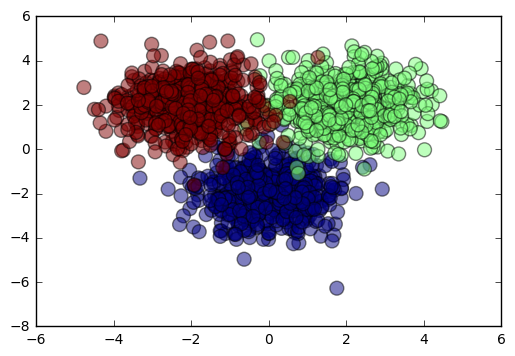

In [3]:
# create random data
S = 500 #sample size of clusters
D = 2 # dimensionality of input
H = 3 # hidden layer size
C = 3 # number of classes
X1 = np.random.randn(S, D) + np.array([0, -2])
X2 = np.random.randn(S, D) + np.array([2, 2])
X3 = np.random.randn(S, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])
#labels
Y = np.array([0]*S + [1]*S + [2]*S)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, H))
for i in range(N):
    T[i, Y[i]] = 1
# scatter plot of clusters
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [7]:
# initial (random) weights
W1 = np.random.randn(D, H)
b1 = np.random.randn(H)
W2 = np.random.randn(H, C)
b2 = np.random.randn(C)

learning_rate = 10e-7
costs = []
for epoch in range(100000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 10000 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)
# gradient ascent
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)

cost: -2690.4408362 classification_rate: 0.332
cost: -783.998264184 classification_rate: 0.8413333333333334
cost: -475.996818675 classification_rate: 0.9466666666666667
cost: -321.042669483 classification_rate: 0.9666666666666667
cost: -247.504317934 classification_rate: 0.9753333333333334
cost: -208.508594216 classification_rate: 0.9753333333333334
cost: -185.447597986 classification_rate: 0.976
cost: -170.563529433 classification_rate: 0.9773333333333334
cost: -160.293214578 classification_rate: 0.9773333333333334
cost: -152.835710264 classification_rate: 0.9766666666666667


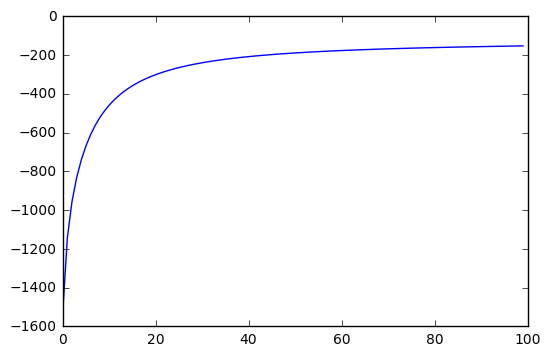

In [6]:
# plot progress
plt.plot(costs)
plt.show()